### Table of Contents:
### 1. [Imports](#importing-files)
### 2. [Acquire & Prepare](#acquire--prepare)
### 3. [Explore](#explore)
3a. [Exploring Continious Distributions](#explore-continious-distributions)\
3b. [Exploring Categorical Distributions](#explore-categorical-distributions)\
3c. [Exploring Correlations](#explore-correlations-with-similar-data)
### 4. [Modeling](#modeling)
4a. [Determining Baseline](#determining-baseline)\
4b. [Model 1: Logistic Regression](#model-1-logistic-regression)\
4c. [Model 1: Decision Tree](#model-2-decision-tree)\
4d. [Model 1: K Nearest Neighbor](#model-1-k-nearest-neighbor)
___
    

## Importing Files

In [1]:
# My created .py files for modularization
import env
import os
import acquire
import prepare
import mods as m
# Ignore Warning
import warnings
warnings.filterwarnings("ignore")
# Array and Dataframes
import numpy as np
import pandas as pd
# Evaluation: Visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Evaluation: Statistical Analysis
from scipy import stats
# Modeling
from sklearn.model_selection import GridSearchCV
# Logistic Regression
from sklearn.linear_model import LogisticRegression as lr
# Decision Tree
from sklearn.tree import DecisionTreeClassifier as dt, plot_tree, export_text
# K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
# Splitting
from sklearn.model_selection import train_test_split
# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

___

## Acquire & Prepare
*Completed before hand*

In [58]:
telco = acquire.get_telco_data()

In [61]:
telco.sample(5)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,customer_id,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,internet_service_type_id,internet_service_type,payment_type_id,payment_type,contract_type_id,contract_type
5536,5522-JBWMO,Male,0,No,Yes,1,Yes,No,1,No,No,No,No,No,No,1,No,1,44.00,44,No,5522-JBWMO,Yes,No,1,No,No,No,No,No,No,1,DSL,1,Electronic check,1,Month-to-month
3045,5438-QMDDL,Female,0,Yes,No,19,Yes,No,1,No,Yes,No,No,No,Yes,1,Yes,2,59.80,1130.85,No,5438-QMDDL,Yes,No,1,No,Yes,No,No,No,Yes,1,DSL,2,Mailed check,1,Month-to-month
2487,3811-VBYBZ,Male,0,No,No,7,Yes,Yes,2,No,Yes,No,No,Yes,Yes,1,Yes,1,99.80,673.25,Yes,3811-VBYBZ,Yes,Yes,2,No,Yes,No,No,Yes,Yes,2,Fiber optic,1,Electronic check,1,Month-to-month
3099,5577-OTWWW,Female,0,No,No,15,Yes,No,3,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1,No,3,19.75,297.3,Yes,5577-OTWWW,Yes,No,3,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,None,3,Bank transfer (automatic),1,Month-to-month
5431,5248-RPYWW,Female,1,Yes,Yes,72,Yes,Yes,1,Yes,Yes,Yes,Yes,Yes,Yes,3,Yes,3,90.15,6716.45,No,5248-RPYWW,Yes,Yes,1,Yes,Yes,Yes,Yes,Yes,Yes,1,DSL,3,Bank transfer (automatic),3,Two year


In [ ]:
telco.info()

In [2]:
# combination of acquire & prepare in one function
telco = prepare.prep_telco()

In [ ]:
# reconfirm there are no missing values
telco.isnull().sum()

In [4]:
# seperate data for training, validation and testing
train, validate, test = prepare.splitter(telco,target='churn')

Dataframe: (7043, 46) 100%

Train: (4507, 46) | ~60%
Validate: (1127, 46) | ~20%
Test: (1409, 46) | ~20%


In [5]:
# view all columns with associated values to observe
pd.set_option('display.max_columns', None)


In [6]:
telco.dtypes

customer_id                              object
gender                                   object
senior_citizen                            int64
partner                                  object
dependents                               object
tenure                                    int64
phone_service                            object
multiple_lines                           object
internet_service_type_id                  int64
online_security                          object
online_backup                            object
device_protection                        object
tech_support                             object
streaming_tv                             object
streaming_movies                         object
contract_type_id                          int64
paperless_billing                        object
payment_type_id                           int64
monthly_charges                         float64
total_charges                           float64
churn                                   

In [7]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customer_id                           7043 non-null   object 
 1   gender                                7043 non-null   object 
 2   senior_citizen                        7043 non-null   int64  
 3   partner                               7043 non-null   object 
 4   dependents                            7043 non-null   object 
 5   tenure                                7043 non-null   int64  
 6   phone_service                         7043 non-null   object 
 7   multiple_lines                        7043 non-null   object 
 8   internet_service_type_id              7043 non-null   int64  
 9   online_security                       7043 non-null   object 
 10  online_backup                         7043 non-null   object 
 11  device_protection

In [8]:
telco.sample(5)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type,payment_type,contract_type,partner_binary,dependents_binary,phone_service_binary,gender_binary,paperless_billing_binary,churn_binary,multiple_lines_no_phone_service,multiple_lines_yes,online_security_yes,online_backup_yes,payment_type_credit_card_(automatic),payment_type_electronic_check,payment_type_mailed_check,contract_type_one_year,contract_type_two_year,tech_support_yes,streaming_tv_yes,streaming_movies_yes,device_protection_yes,internet_service_type_fiber_optic,internet_service_type_none,contract_type_month_to_month
1093,1591-NFNLQ,Male,0,No,No,51,Yes,Yes,2,No,No,Yes,No,No,No,1,No,4,80.00,4242.35,Yes,Fiber optic,Credit card (automatic),Month-to-month,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1
5136,4544-RXFMG,Male,0,Yes,Yes,8,Yes,No,1,No,No,No,No,No,No,2,Yes,2,43.45,345.50,No,DSL,Mailed check,One year,1,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
4732,3441-CGZJH,Female,0,Yes,Yes,43,No,No phone service,1,Yes,No,Yes,Yes,Yes,Yes,2,Yes,4,60.40,2640.55,No,DSL,Credit card (automatic),One year,1,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,1,1,1,0,0,0
4720,3391-JSQEW,Male,0,Yes,No,40,Yes,No,1,No,Yes,No,No,No,No,1,Yes,2,50.15,2058.50,No,DSL,Mailed check,Month-to-month,1,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2925,5120-ZBLAI,Female,0,Yes,No,50,Yes,Yes,1,No,No,Yes,No,Yes,Yes,2,No,3,75.70,3876.20,No,DSL,Bank transfer (automatic),One year,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0


___

## Explore: Hypothesis
- Customers will be less likely to unsubscribe if they have a family (partner dependents) due to the likelihood that the rest of the family will want to resume services.

- Customers that are senior citizen may be less likely to utilize multiple services as well as churn due to complications with changing plans.

- The longer the customer has been with the company the less likely they are to churn due to ease of services and maybe a grandfathered payment price.

- If the customer's bill price is higher than average they be more likely to churn.

- The customer's contract plan may be indicative of how long they intend to be with the provider considering this would lower their window to churn.

- If the customer pays for additional services they will be less likely to churn, this could be due to satisfaction of the additional services.


## Explore: Feature Engineer

In [9]:
#
train['additional_services'] = (train[['device_protection','online_security','streaming_movies','streaming_tv','online_backup','tech_support']] == 'Yes').sum(axis=1)
validate['additional_services'] = (train[['device_protection','online_security','streaming_movies','streaming_tv','online_backup','tech_support']] == 'Yes').sum(axis=1)
test['additional_services'] = (train[['device_protection','online_security','streaming_movies','streaming_tv','online_backup','tech_support']] == 'Yes').sum(axis=1)

In [10]:
# organize columns is a function to seperate columns from catergorical to numerical data types
cat_cols, num_cols = m.organize_columns(train)

## Explore: Categorical Distributions

In [12]:
# compiling categorical columns
cat_cols = train[cat_cols]

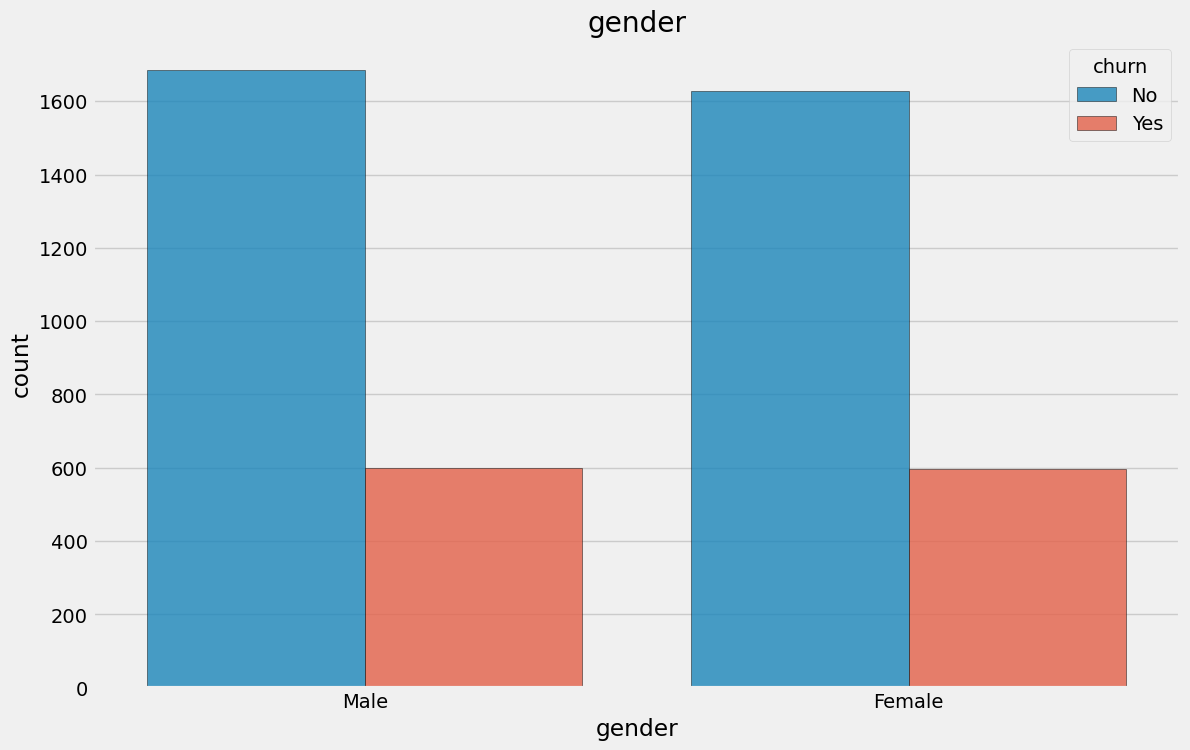

-------------------------------------------------------------


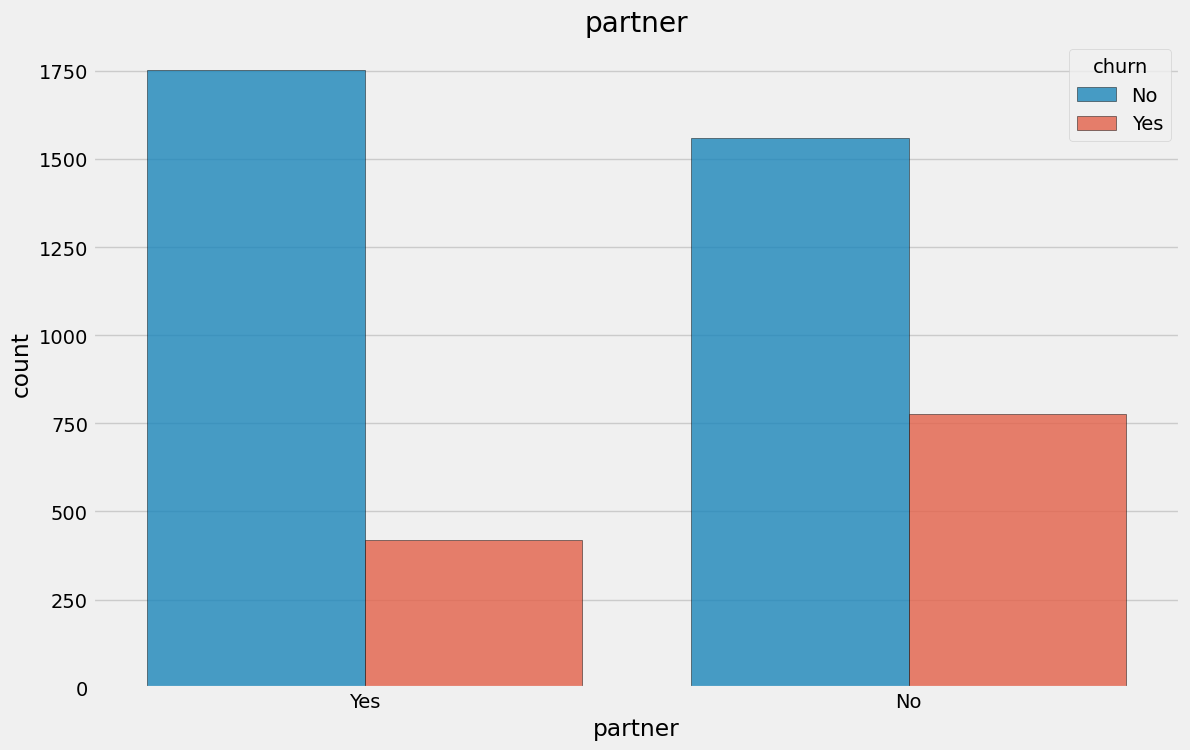

-------------------------------------------------------------


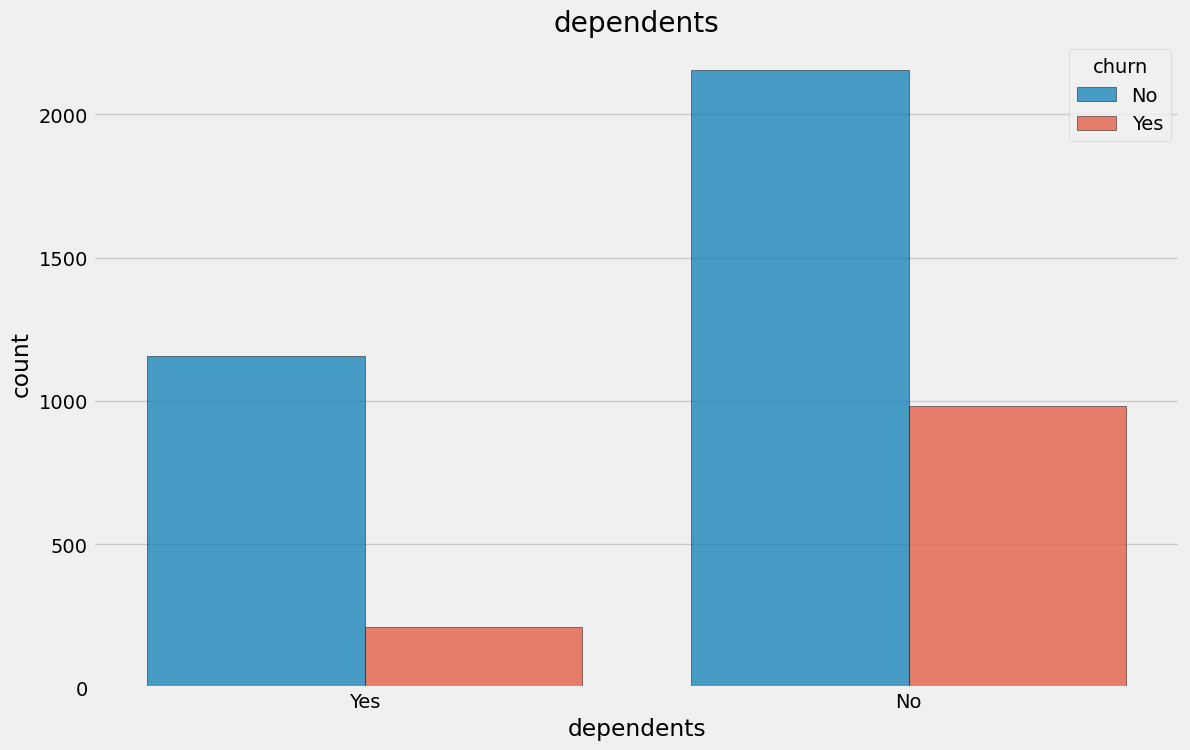

-------------------------------------------------------------


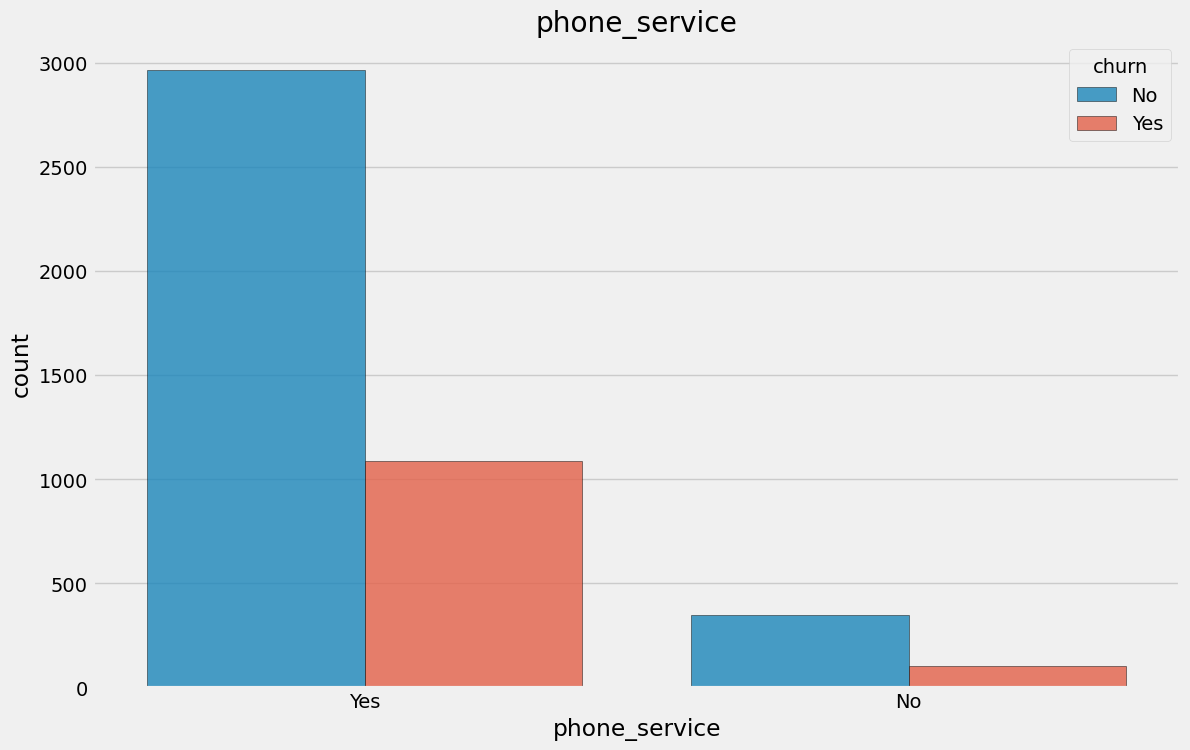

-------------------------------------------------------------


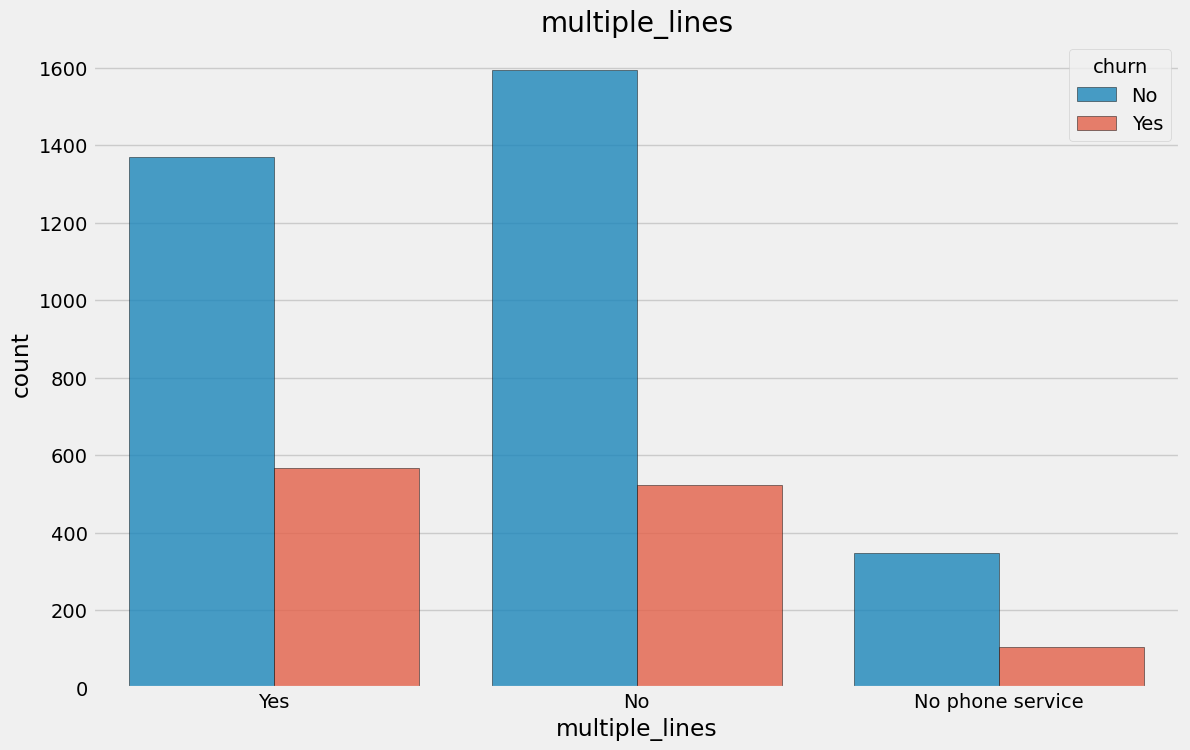

-------------------------------------------------------------


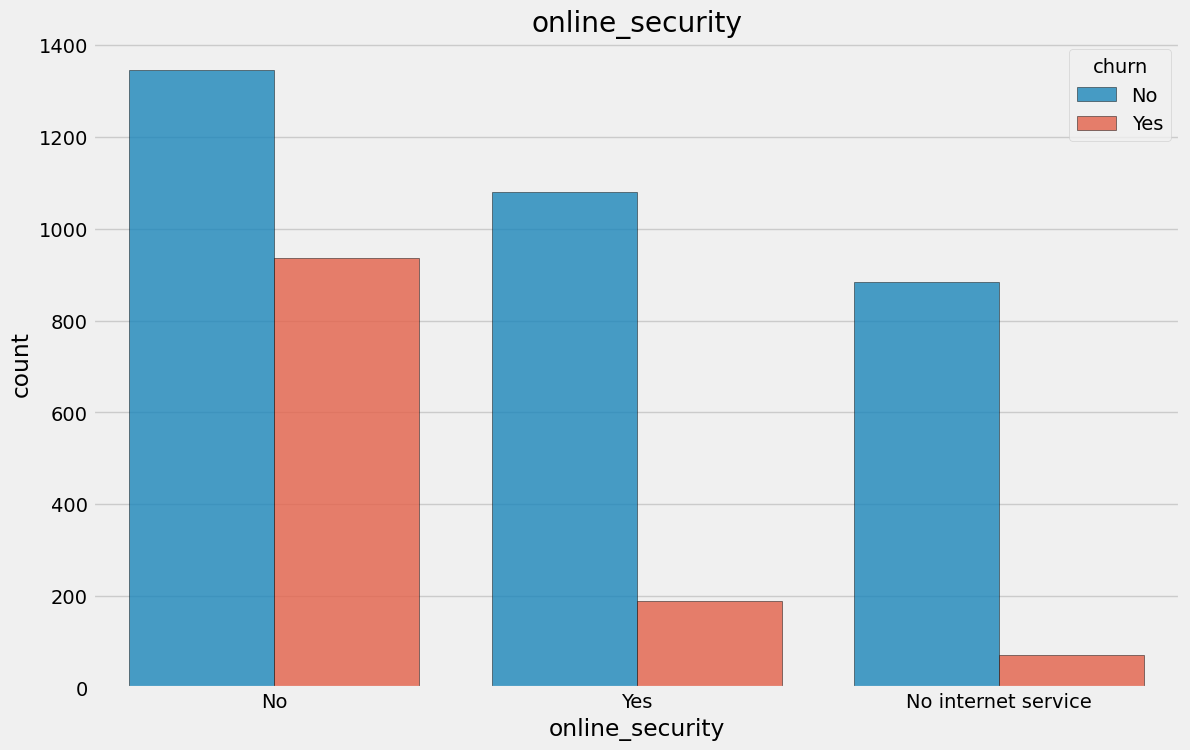

-------------------------------------------------------------


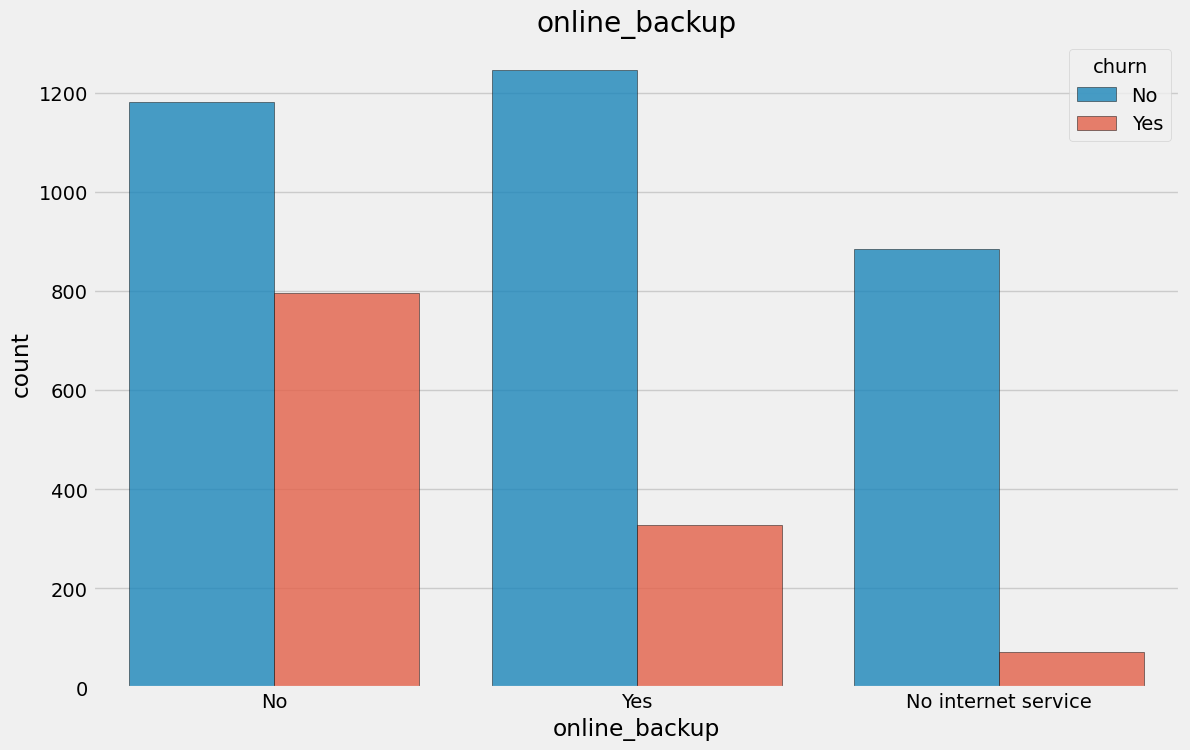

-------------------------------------------------------------


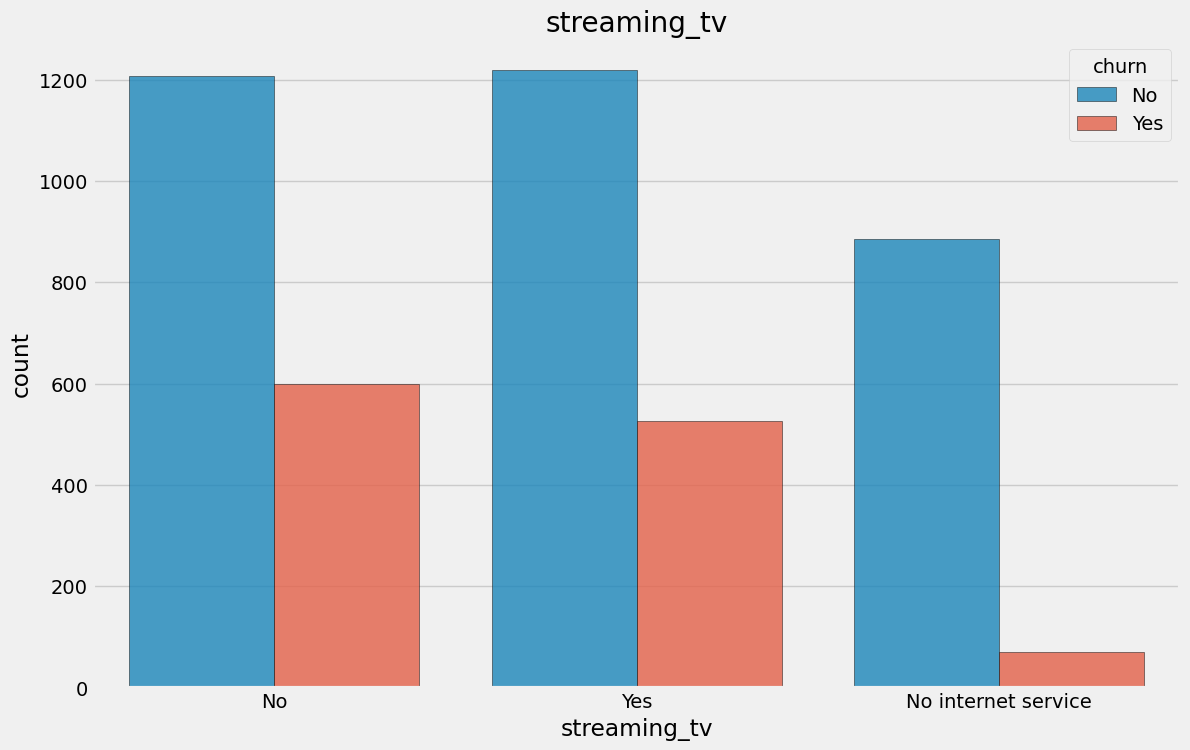

-------------------------------------------------------------


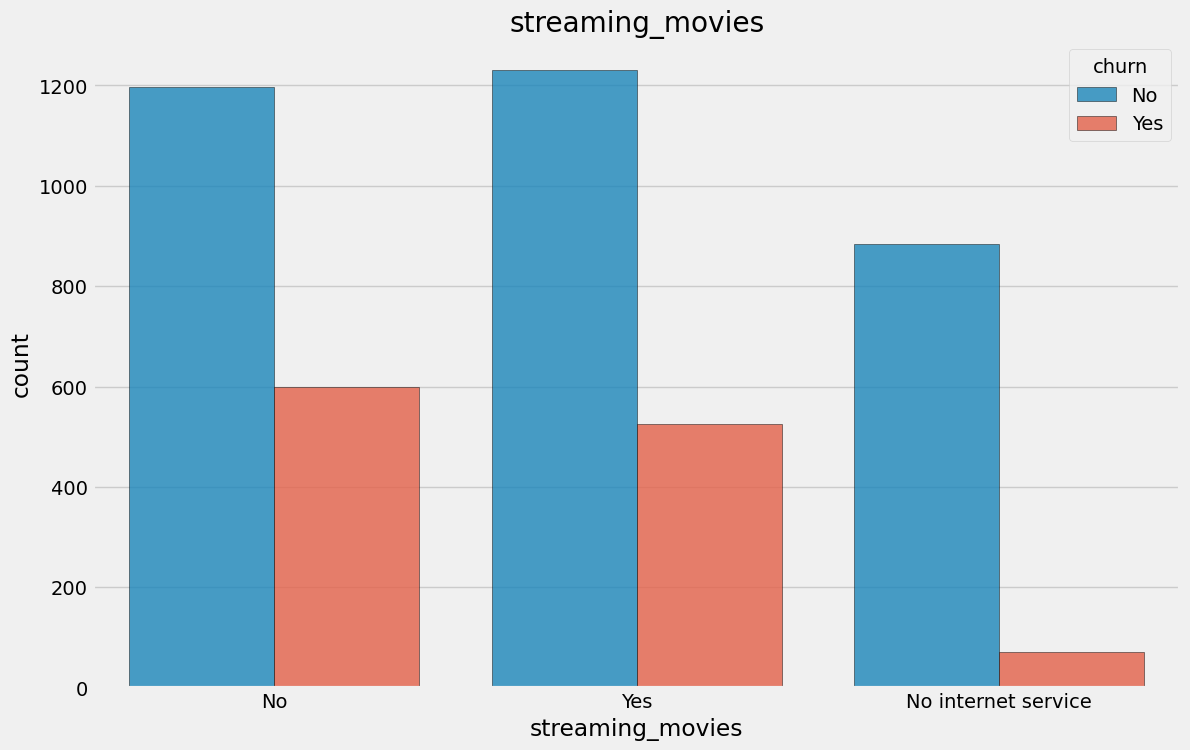

-------------------------------------------------------------


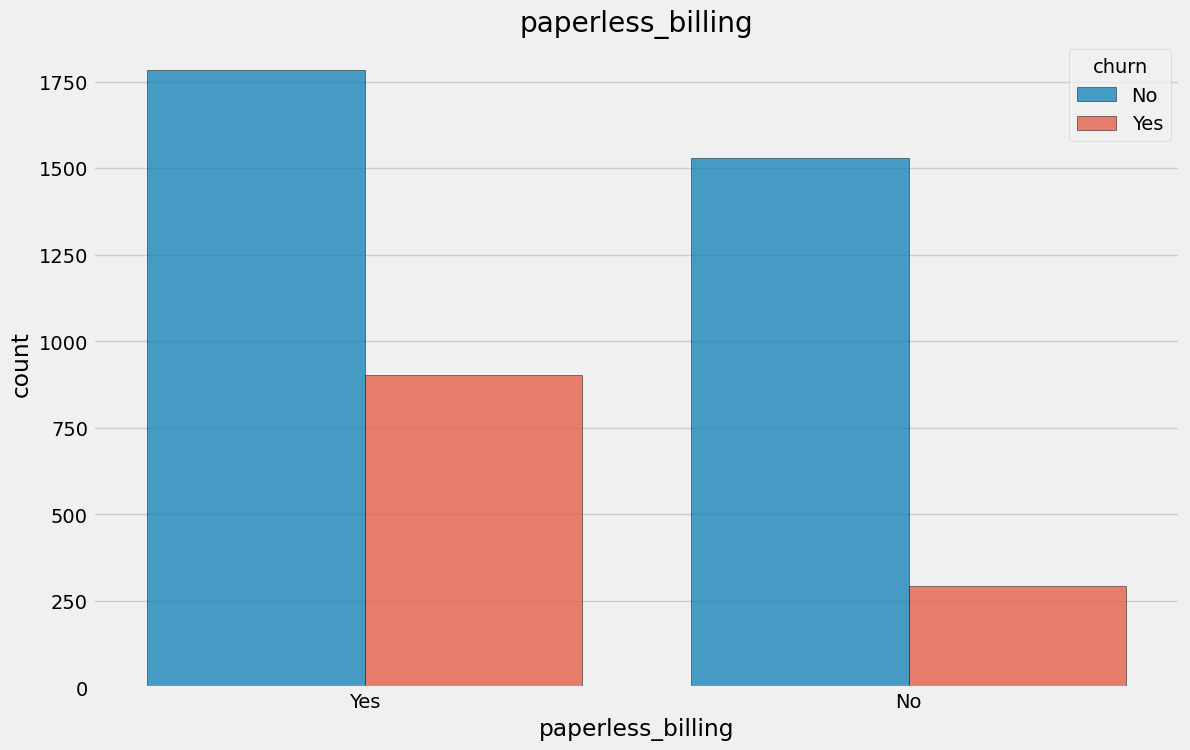

-------------------------------------------------------------


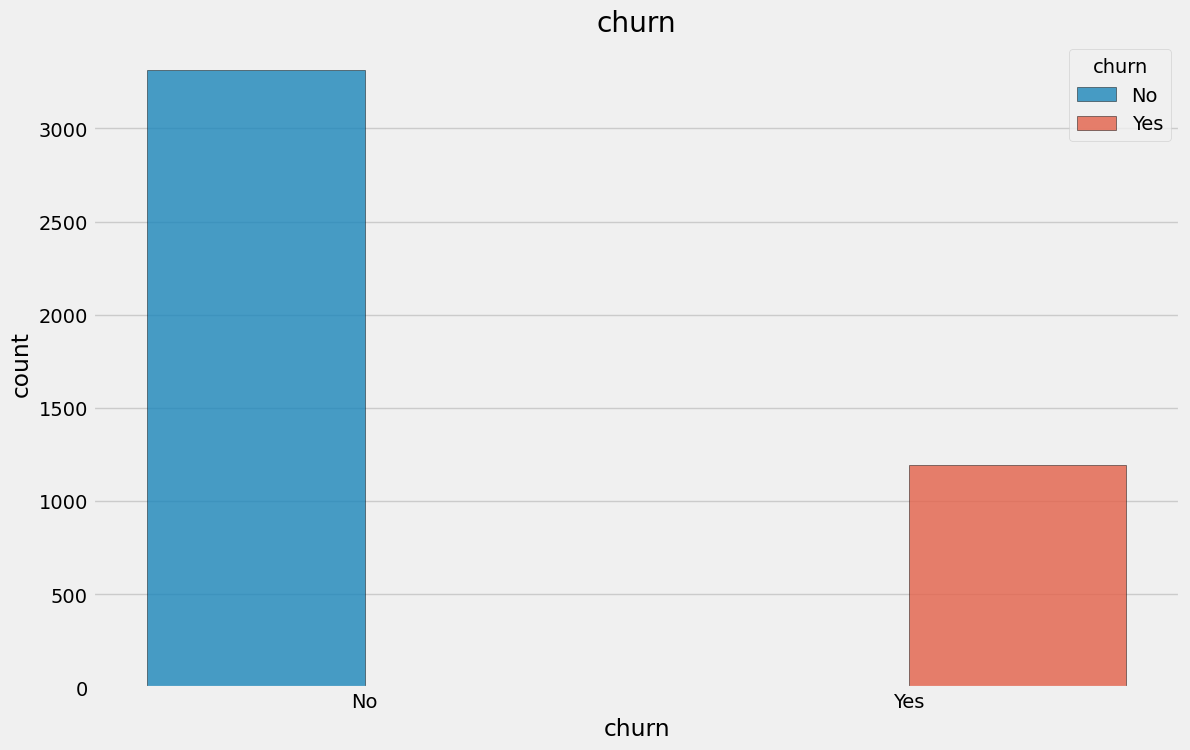

-------------------------------------------------------------


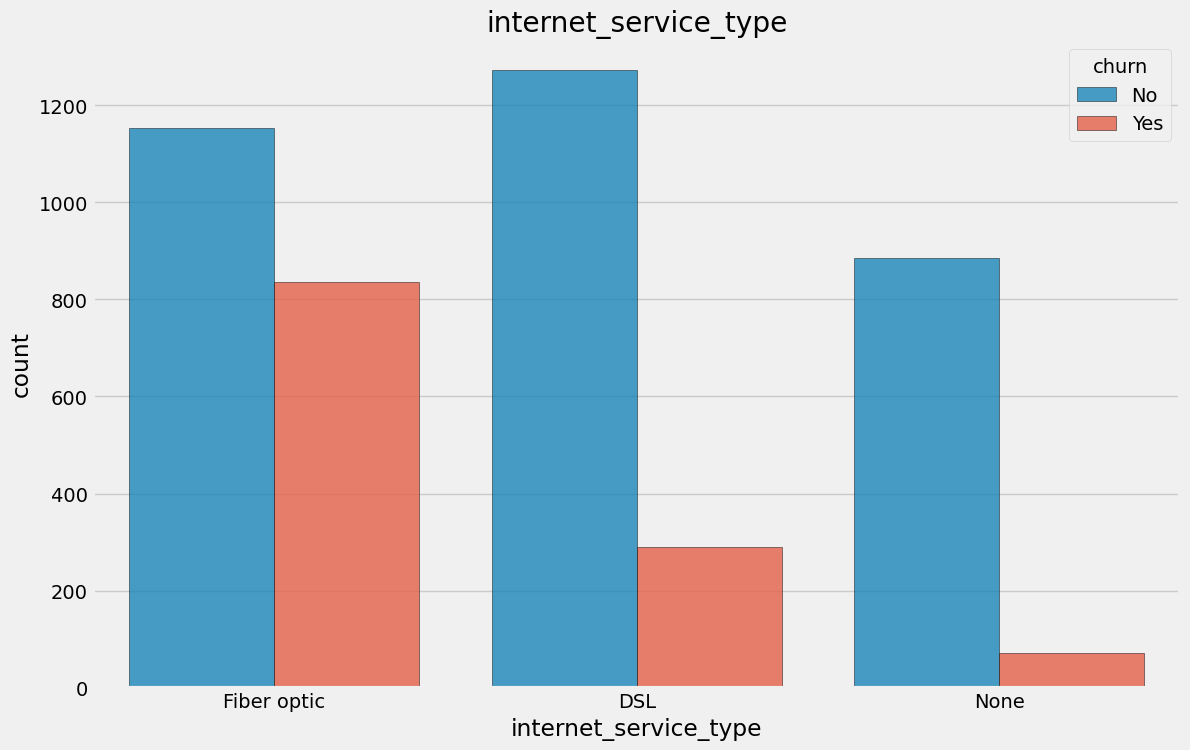

-------------------------------------------------------------


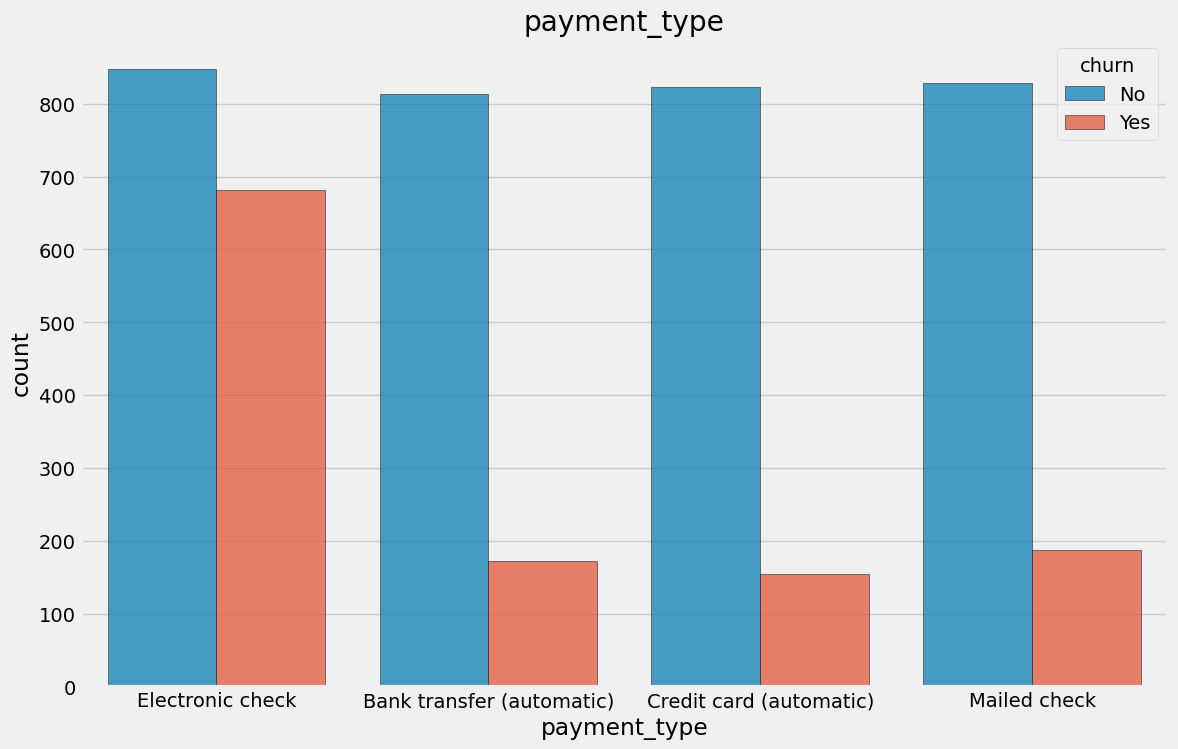

-------------------------------------------------------------


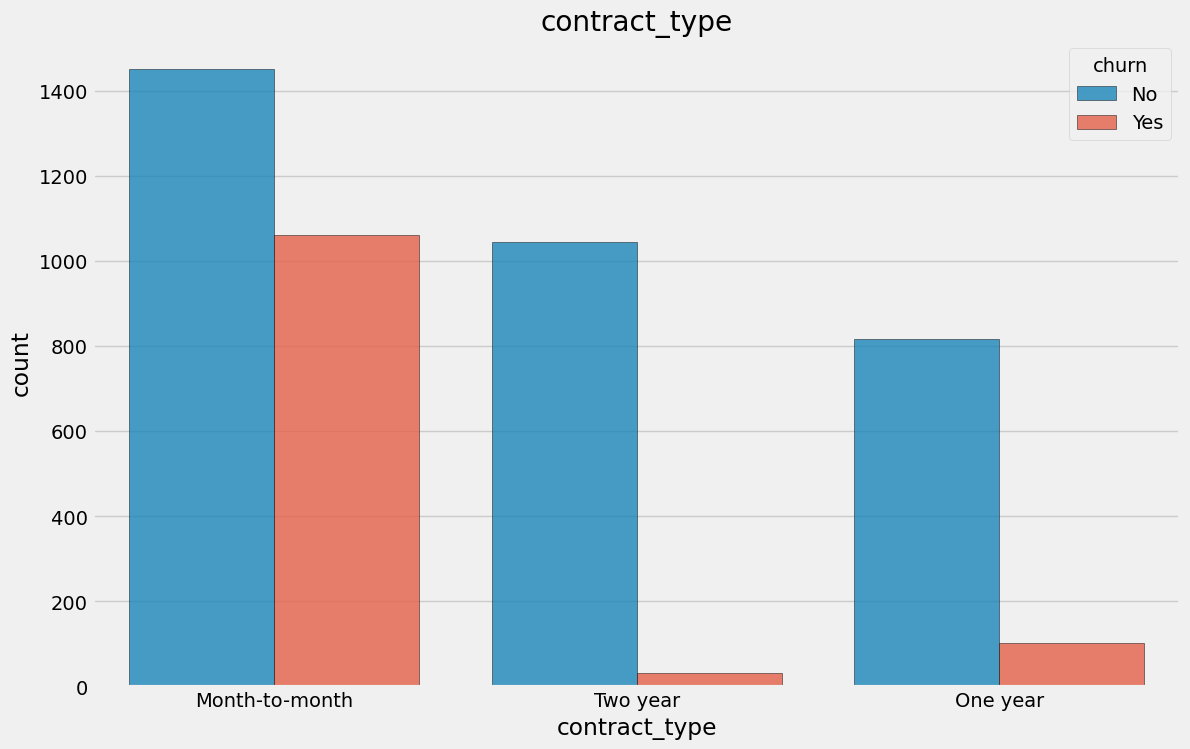

-------------------------------------------------------------


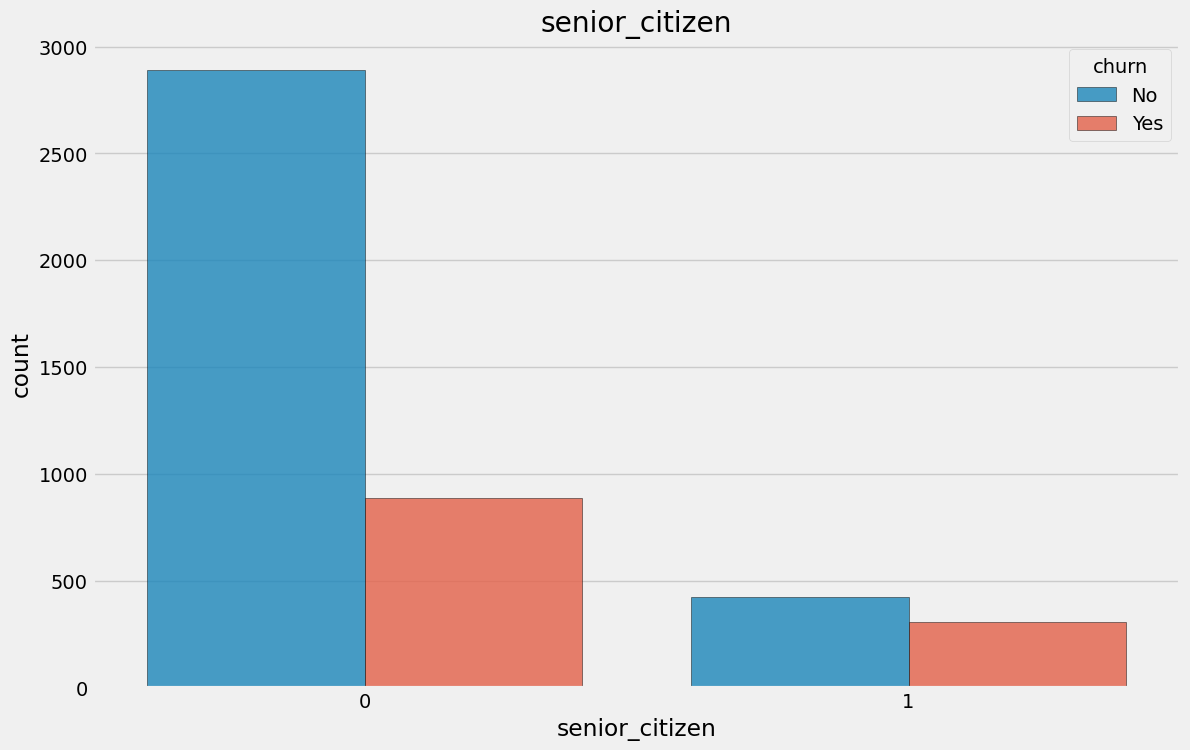

-------------------------------------------------------------


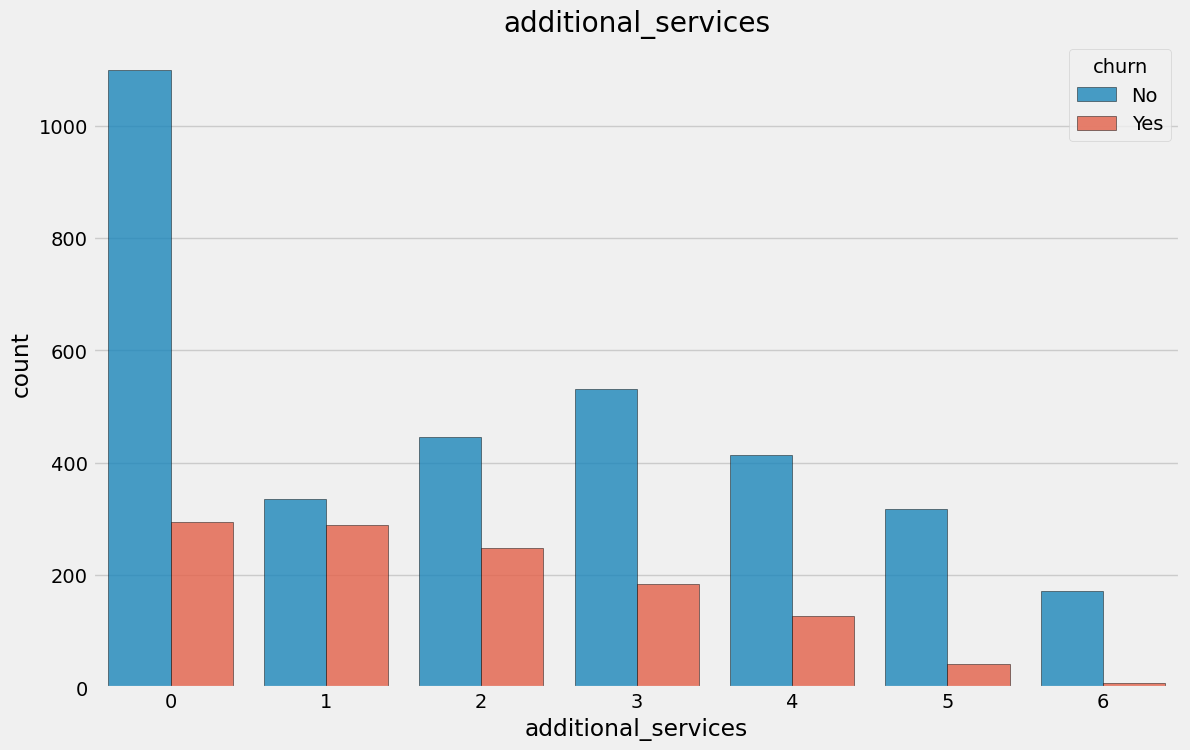

-------------------------------------------------------------


In [63]:
# Function to loop through desired df and respective columns to visualize 
m.check_cat_distribution(cat_cols)

In [14]:
# Observed irregular distributions in phone_service so conducting
# statistical analysis on churn x phone_service

**Set null Hypothesis to examine these two features**
___

Null $H_0$: There is **no** association between churn & phone service\
Null $H_a$: There *is* an association between churn & phone service

In [15]:
m. chi2_test(train['churn'],train['phone_service'])

We fail to reject the null hypothesis with a p-score of: {0.11722043938362048}


phone_service,No,Yes
churn,,
No,348,2963
Yes,106,1090


**Set null Hypothesis to examine these two features**
___

Null $H_0$: There is **no** association between churn & senior citizens\
Null $H_a$: There *is* an association between churn & senior citizens

In [16]:
m.chi2_test(train['churn'],train['senior_citizen'])

We can reject the null hypothesis with a p-score of: {2.7803174215206096e-25}


senior_citizen,0,1
churn,,
No,2888,423
Yes,888,308


## Explore: Continious Distributions

In [17]:
# compiling continious columns
num_cols = train[num_cols]

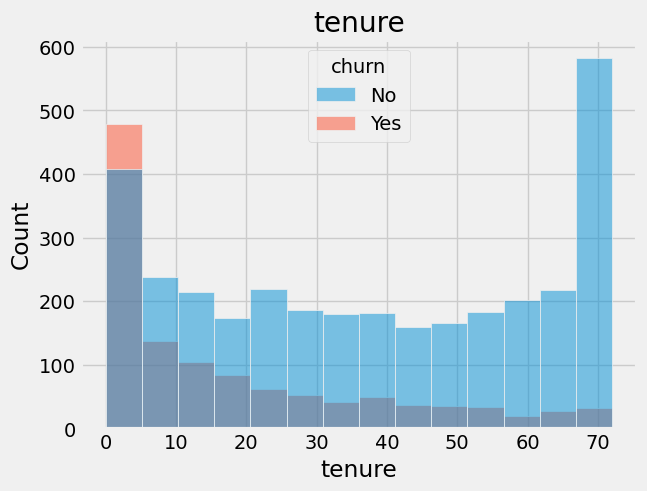

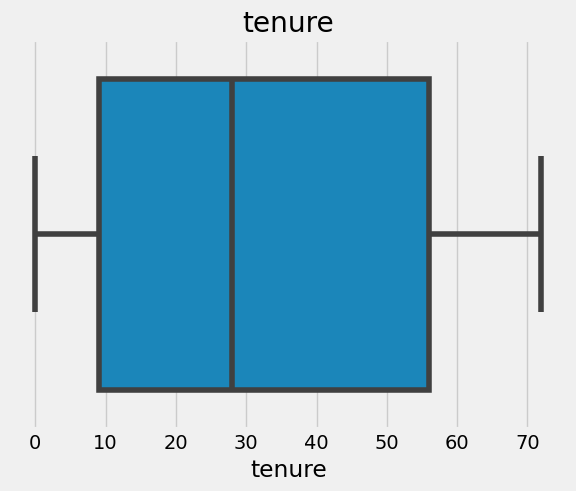

-------------------------------------------------------------


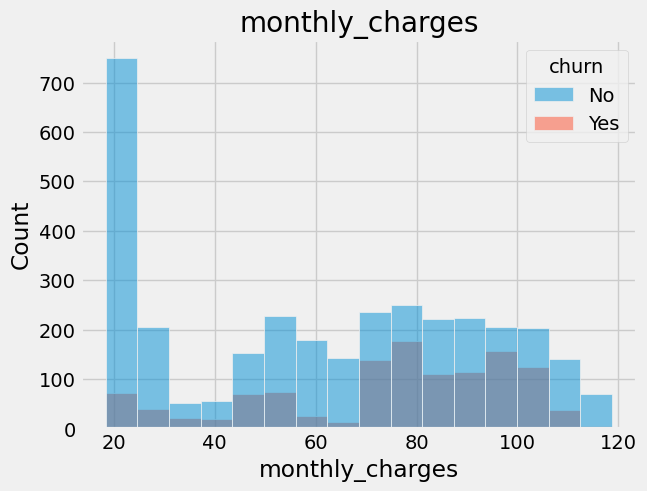

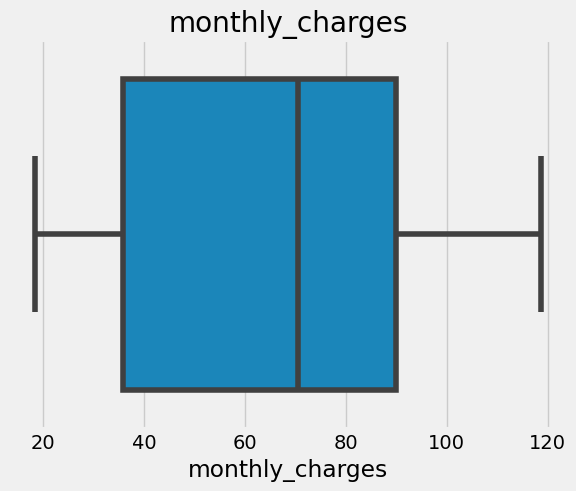

-------------------------------------------------------------


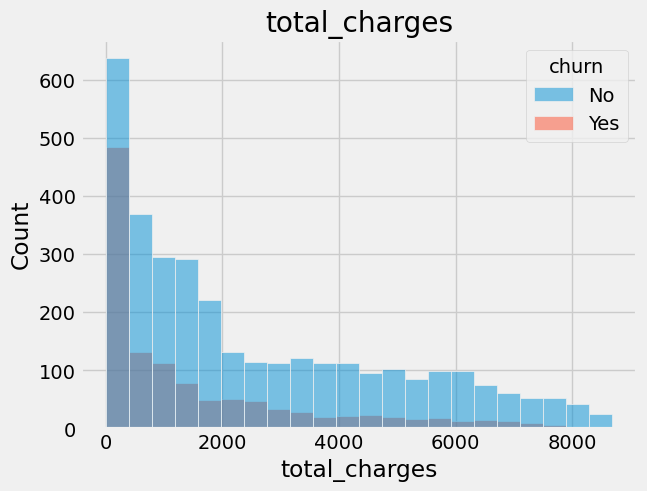

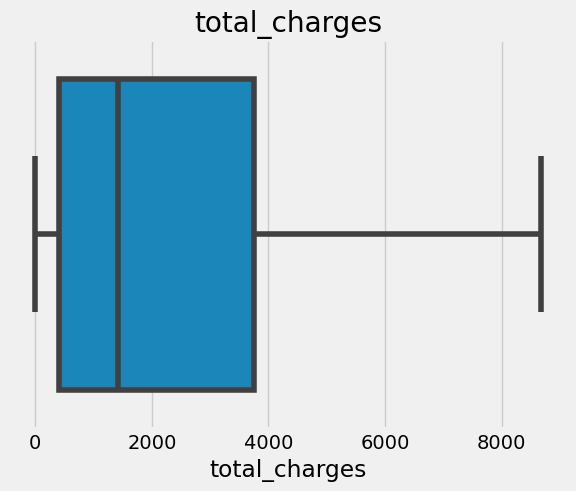

-------------------------------------------------------------


In [18]:
# Loop through respective df and column
m.check_num_distribution(num_cols,dataset=train)

#### A negative correlation between tenure and churn can be observed

## Explore: Correlations with Similar Data

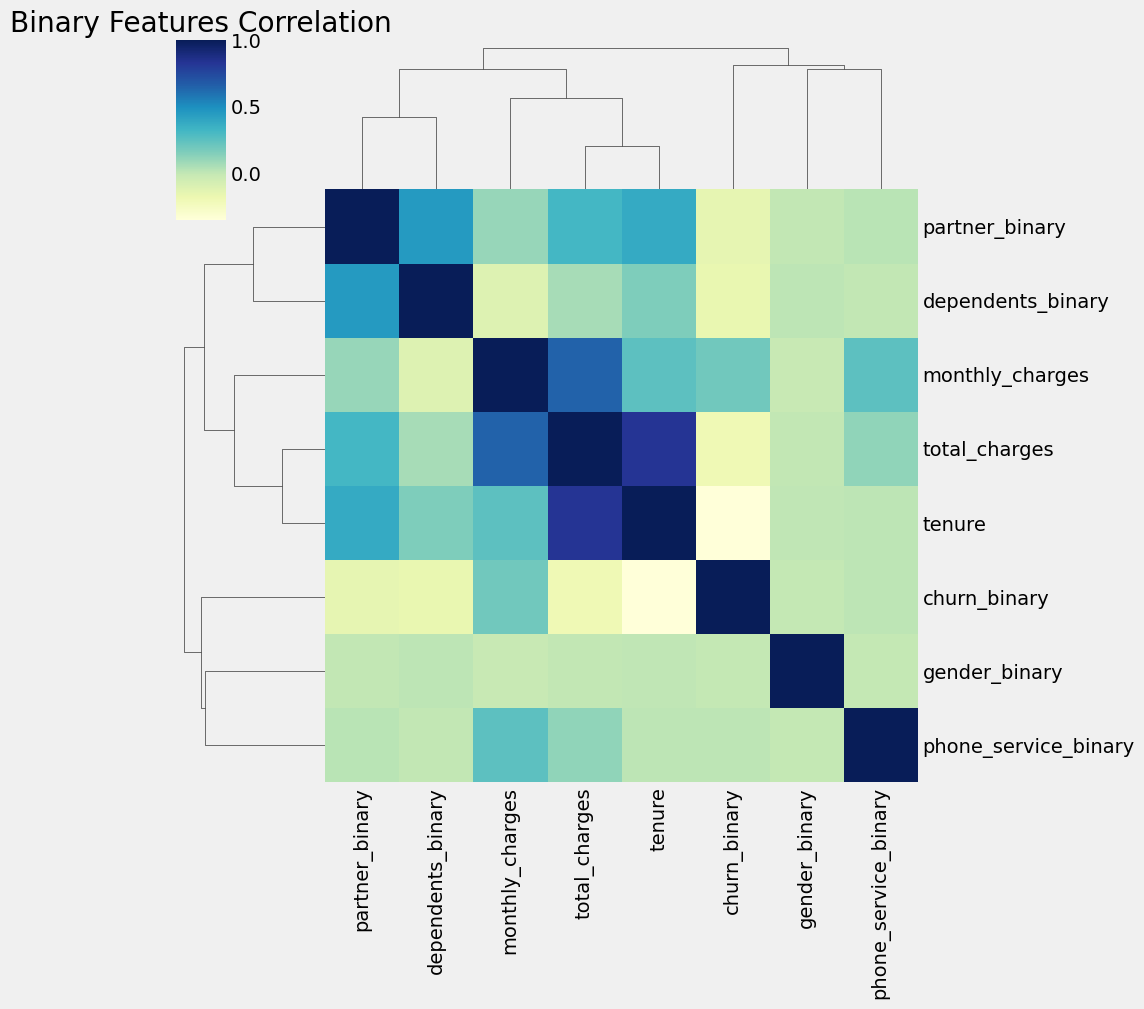

In [19]:
# Clustering correlation grid comparison

# Exploring binary categorical data as well as our two continious values -- total_charges & monthly_charges
telco_grid = telco[['churn_binary','gender_binary','partner_binary','dependents_binary','phone_service_binary'\
    ,'total_charges','monthly_charges','tenure']]
sns_plot = sns.clustermap(telco_grid.corr(),cmap = 'YlGnBu')
plt.title('Binary Features Correlation')
plt.show()

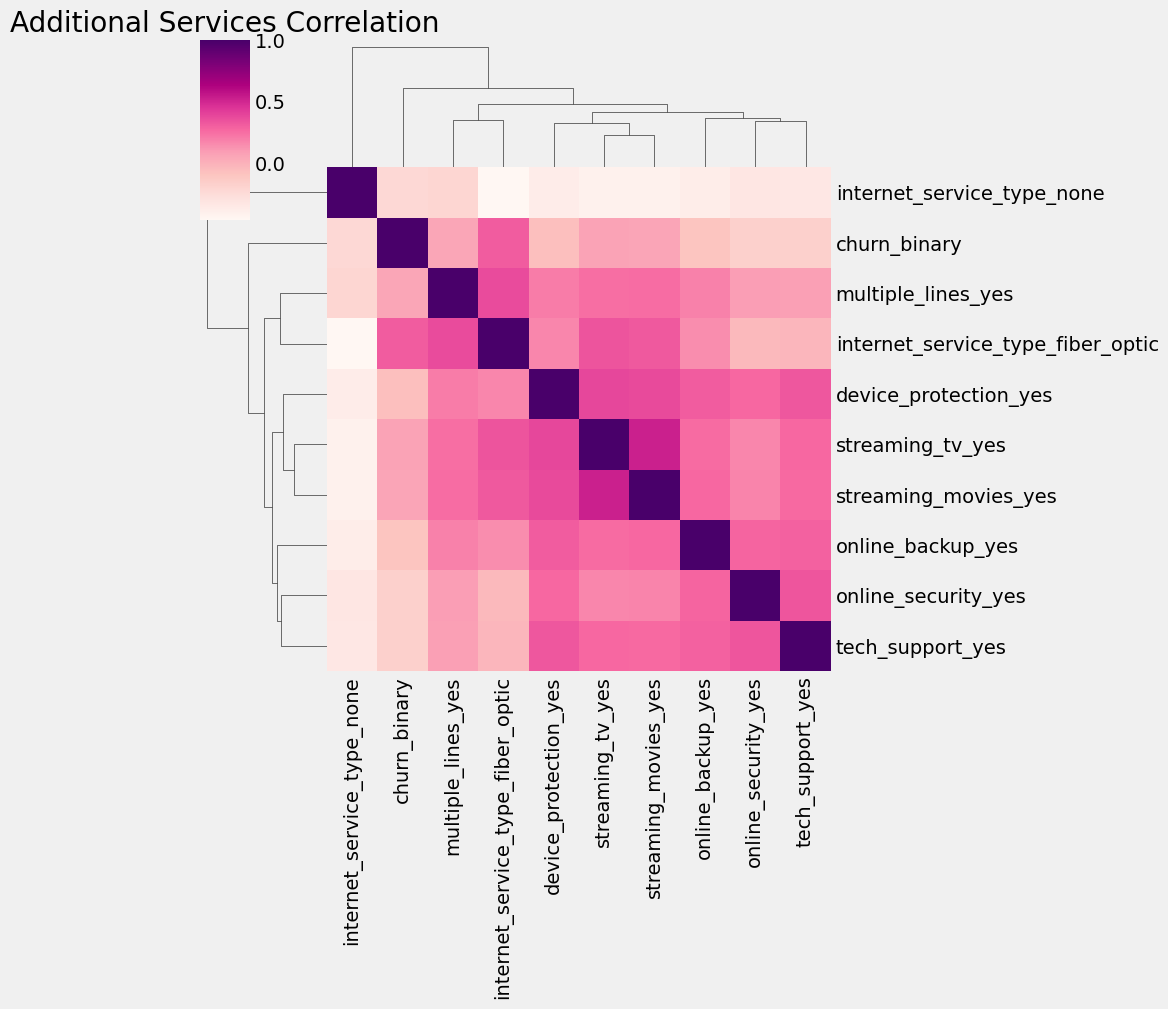

In [20]:
# Clustering correlation grid comparing

# Exploring multicategorical data that is also association as our 'additional services' provided by telco

telco_services = train[['churn_binary','multiple_lines_yes','online_security_yes','online_backup_yes','tech_support_yes','streaming_tv_yes',\
                        'streaming_movies_yes','device_protection_yes','internet_service_type_fiber_optic','internet_service_type_none']]
sns_plot = sns.clustermap(telco_services.corr(),cmap = 'RdPu')
plt.title('Additional Services Correlation')
plt.show()

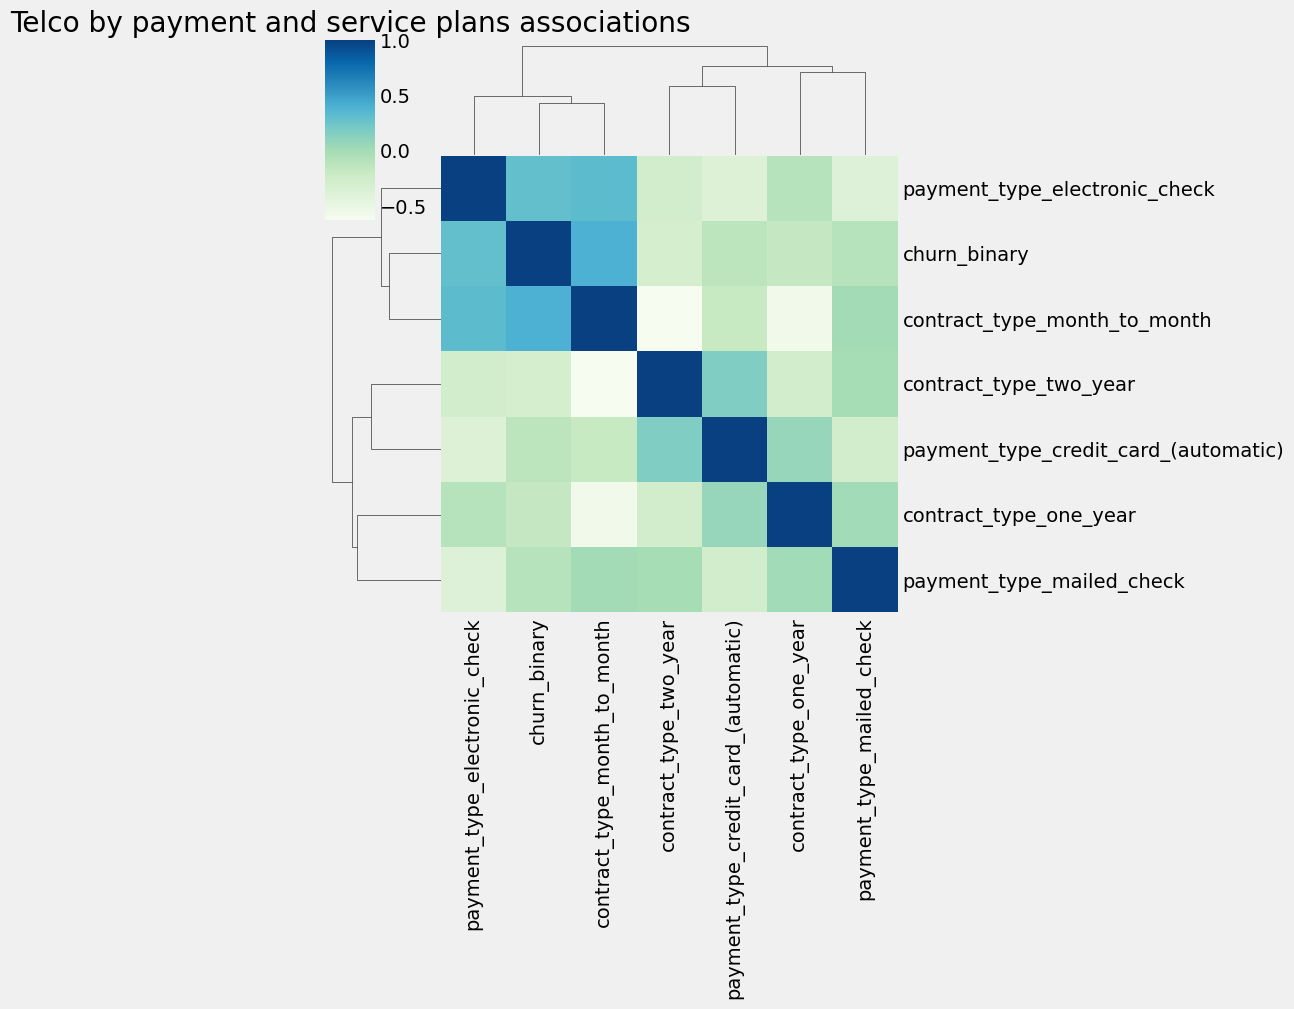

In [21]:
telco_plans = train[['churn_binary','contract_type_month_to_month','contract_type_two_year',
'contract_type_one_year','payment_type_mailed_check','payment_type_electronic_check',
'payment_type_credit_card_(automatic)']]
sns_plot = sns.clustermap(telco_plans.corr(),cmap = 'GnBu')
plt.title('Telco by payment and service plans associations')
plt.show()


## Correlation grids help strengthen previous hunches and allow for a better assessment on feature testing
- ### Slight correlation between churn_binary and payment_type_electronic_check
- ### Stronger correlation between churn_binary and contract_type_month_to_month
- ### Negative correlation between churn_binary and tenure
- ### Slight correlation between churn_binary and monthly_charges
- ### Slight correlation between churn_binary and internet_service_type_fiber_optic

**Set null Hypothesis to examine these two features**
___

Null $H_0$: There is **no** association between *churn* & having a *month-to-month contract*\
Null $H_a$: There *is* an association between *churn* & having a *month-to-month contract*

In [22]:
# conduct statistical analysis of churn x contract_type_month_to_month
m.chi2_test(train['churn_binary'],train['contract_type_month_to_month'])

We can reject the null hypothesis with a p-score of: {7.035284556920665e-158}


contract_type_month_to_month,0,1
churn_binary,,
0,1861,1450
1,135,1061


**Set null Hypothesis to examine these two features**
___

Null $H_0$: There is **no** association between *churn* & *payment_type_electronic_check*\
Null $H_a$: There *is* an association between *churn* & *payment_type_electronic_check*

In [23]:
m.chi2_test(train['churn_binary'],train['payment_type_electronic_check'])

We can reject the null hypothesis with a p-score of: {1.5447802156582827e-85}


payment_type_electronic_check,0,1
churn_binary,,
0,2464,847
1,515,681


**Set null Hypothesis to examine these two features**
___

Null $H_0$: There is **no** association between *churn* & *internet_service_type_fiber_optic*\
Null $H_a$: There *is* an association between *churn* & *internet_service_type_fiber_optic*

In [24]:
m.chi2_test(train['churn_binary'],train['internet_service_type_fiber_optic'])

We can reject the null hypothesis with a p-score of: {1.9919197608136183e-96}


internet_service_type_fiber_optic,0,1
churn_binary,,
0,2157,1154
1,361,835


**Set null Hypothesis to examine these two features**
___

Null $H_0$: There is **no** association between *churn* & *monthly_charges*\
Null $H_a$: There *is* an association between *churn* & *monthly_charges*

In [25]:
train.groupby('churn')['monthly_charges'].mean()

monthly_churned = train[train.churn == 'Yes']['monthly_charges']
monthly_nochurn = train[train.churn == 'No']['monthly_charges']


In [26]:
# Set alpha
α = .05
# Assuming equal variance
t_stat, p = stats.ttest_ind(monthly_churned,monthly_nochurn,equal_var=True)
p

m.check_p(p)

We can reject the null hypothesis with a p-score of: {1.481195740841378e-40}


**Set null Hypothesis to examine these two features**
___

Null $H_0$: There is **no** association between *churn* & *tenure*\
Null $H_a$: There *is* an association between *churn* & *tenure*

In [27]:
tenure_churned = train[train.churn == 'Yes']['tenure']
tenure_nochurn = train[train.churn == 'No']['tenure']

In [28]:
# Set alpha
α = .05
# Assuming equal variance
t_stat, p = stats.ttest_ind(tenure_churned,tenure_nochurn,equal_var=True)
p

m.check_p(p)

We can reject the null hypothesis with a p-score of: {5.213539721523729e-130}


# Modeling

## Features Selected
___
- continious - monthly_charges
- continious - tenure
- categorical - contract_type_month_to_month
- categorical - payment_type_electronic_check
- categorical - internet_service_type_fiber_optic
- categorical - senior_citizen_binary

## Determining Baseline

In [29]:
train['churn_binary'].value_counts()
baseline_accuracy = (train.churn_binary == 0).mean()
baseline_accuracy.round(3)

0.735

## Model 1: Logistic Regression

## Fit & Train

In [30]:
x_train = train[['monthly_charges','tenure','contract_type_month_to_month','payment_type_electronic_check','customer_service_binary']]
y_train = train['churn_binary']
y_train = y_train.values.ravel()

x_val = validate[['monthly_charges','tenure','contract_type_month_to_month','payment_type_electronic_check','internet_service_type_fiber_optic']]
y_val = validate['churn_binary']
y_val = y_val.values.ravel()

x_test = test[['monthly_charges','tenure','contract_type_month_to_month','payment_type_electronic_check','internet_service_type_fiber_optic']]
y_test = test['churn_binary']
y_test = y_test.values.ravel()

In [31]:
logit = lr(C=.3, random_state=4343)

In [32]:
logit.fit(x_train,y_train)

LogisticRegression(C=0.3, random_state=4343)

In [33]:
model1_prediction = logit.predict(x_train)
model1_probability = logit.predict_proba(x_train)

model1_prediction_val = logit.predict(x_val)
model1_probability_val = logit.predict_proba(x_val)

model1_prediction_test = logit.predict(x_test)
model1_probability_test = logit.predict_proba(x_test)

## Model 1: Evaluation

### Model 1: Confusion Matrix

In [34]:
cm = confusion_matrix(y_train,model1_prediction)
cm_disp = ConfusionMatrixDisplay(cm,display_labels=logit.classes_)

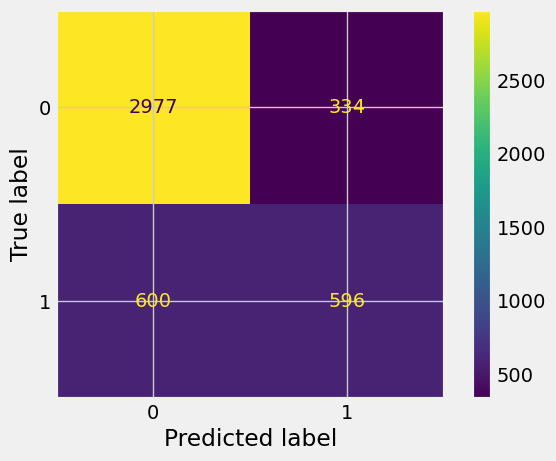

In [35]:
cm_disp.plot()
plt.show()

### Model 1: Classification Report & Metrics

In [36]:
TN, FP, FN, TP = confusion_matrix(y_train, model1_prediction).ravel()
m.get_classification_report(y_train,model1_prediction,)

,precision,recall,f1-score,support
0,0.832262,0.899124,0.864402,3311.000000
accuracy,0.792767,0.792767,0.792767,0.792767
weighted avg,0.781470,0.792767,0.783804,4507.000000
macro avg,0.736561,0.698726,0.712540,4507.000000
1,0.640860,0.498328,0.560677,1196.000000


In [37]:
m.metrics(TN, FP, FN, TP)

Accuracy: 0.7927668071888174

True Positive Rate/Sensitivity/Recall/Power: 0.4983277591973244
False Positive Rate/False Alarm Ratio/Fall-out: 0.10087586831772878
True Negative Rate/Specificity/Selectivity: 0.8991241316822712
False Negative Rate/Miss Rate: 0.5016722408026756

Precision/PPV: 0.6408602150537634
F1 Score: 0.5606773283160865

Support (0): 1196
Support (1): 3311


## Model 1: Metrics for Validate & Test

In [38]:
TN, FP, FN, TP = confusion_matrix(y_val, model1_prediction_val).ravel()
print(classification_report(y_val,model1_prediction_val))

TN, FP, FN, TP = confusion_matrix(y_test, model1_prediction_test).ravel()
m.get_classification_report(y_test,model1_prediction_test)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       828
           1       0.67      0.48      0.56       299

    accuracy                           0.80      1127
   macro avg       0.75      0.70      0.72      1127
weighted avg       0.79      0.80      0.79      1127



,precision,recall,f1-score,support
0,0.827041,0.910145,0.866605,1035.00000
accuracy,0.794180,0.794180,0.794180,0.79418
weighted avg,0.781523,0.794180,0.782484,1409.00000
macro avg,0.741298,0.691703,0.708147,1409.00000
1,0.655556,0.473262,0.549689,374.00000


In [39]:
m.log_regression_compiled(x_train,y_train,x_test,y_test)

Best fit "C" parameter (Determined by GridSearchCV): 0.1
Accuracy: 0.793654315509208

True Positive Rate/Sensitivity/Recall/Power: 0.49665551839464883
False Positive Rate/False Alarm Ratio/Fall-out: 0.09906372697070372
True Negative Rate/Specificity/Selectivity: 0.9009362730292962
False Negative Rate/Miss Rate: 0.5033444816053512

Precision/PPV: 0.6442516268980477
F1 Score: 0.5609065155807366

Support (0): 1196
Support (1): 3311


## Model 1: Logistic Regression Hypertuning for Best Parameters

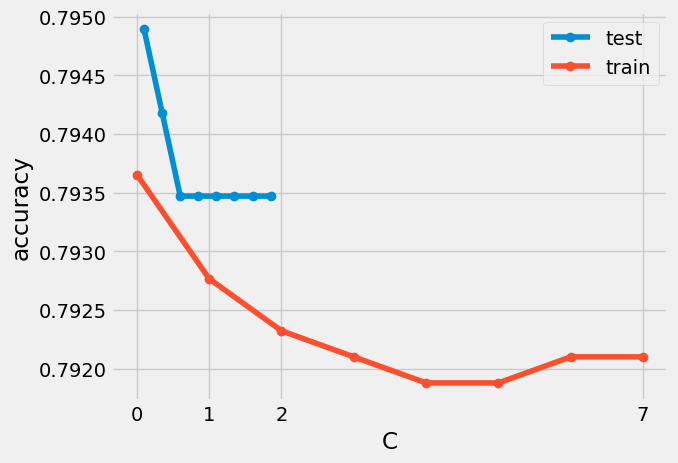

In [40]:
c_range = np.arange(.1, 2, .25)
train_scores = []
test_scores = []
for c in c_range:
    logit_chart = lr(C = c,random_state=4343)
    logit_chart.fit(x_train, y_train)
    train_scores.append(logit_chart.score(x_train, y_train))
    test_scores.append(logit_chart.score(x_test, y_test))
plt.figure()
plt.xlabel('C')
plt.ylabel('accuracy')
plt.plot(c_range, test_scores,'o-',train_scores,'o-')
plt.legend(['test','train'])
plt.xticks([0,1,2,7])
plt.show()

## Evaluation of Logistic Regression

## Model 1: Logistic Regression Evaluated
### Accuracy
---
- Baseline: .735
- Train: .79
- Validate: .80
- Test: .79



With a train accuracy of .79 and 

## Model 1: Decision Tree

In [41]:
clf = dt(max_depth=3,random_state=4343)

In [42]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=4343)

In [43]:
model2_prediction = clf.predict(x_train)
model2_probability = clf.predict_proba(x_train)

model2_prediction_val = clf.predict(x_val)
model2_probability_val = clf.predict_proba(x_val)

model2_prediction_test = clf.predict(x_test)
model2_probability_test = clf.predict_proba(x_test)

In [44]:
TN, FP, FN, TP = confusion_matrix(y_train, model2_prediction).ravel()
m.get_classification_report(y_train,model2_prediction)

,precision,recall,f1-score,support
0,0.811842,0.931743,0.867670,3311.000000
accuracy,0.791214,0.791214,0.791214,0.791214
weighted avg,0.776946,0.791214,0.771567,4507.000000
macro avg,0.746091,0.666958,0.686594,4507.000000
1,0.680339,0.402174,0.505518,1196.000000


In [45]:
m.metrics(TN, FP, FN, TP)

Accuracy: 0.791213667628134

True Positive Rate/Sensitivity/Recall/Power: 0.40217391304347827
False Positive Rate/False Alarm Ratio/Fall-out: 0.06825732407127756
True Negative Rate/Specificity/Selectivity: 0.9317426759287224
False Negative Rate/Miss Rate: 0.5978260869565217

Precision/PPV: 0.6803394625176803
F1 Score: 0.5055176037834996

Support (0): 1196
Support (1): 3311


## Model 1: Validate & Test

In [46]:
TN, FP, FN, TP = confusion_matrix(y_val, model2_prediction_val).ravel()
print(classification_report(y_val,model2_prediction_val))

TN, FP, FN, TP = confusion_matrix(y_test, model2_prediction_test).ravel()
m.get_classification_report(y_test,model2_prediction_test)

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       828
           1       0.69      0.41      0.52       299

    accuracy                           0.80      1127
   macro avg       0.75      0.67      0.69      1127
weighted avg       0.78      0.80      0.78      1127



,precision,recall,f1-score,support
0,0.812183,0.927536,0.866035,1035.000000
accuracy,0.789212,0.789212,0.789212,0.789212
weighted avg,0.774337,0.789212,0.770422,1409.000000
macro avg,0.740893,0.666977,0.685929,1409.000000
1,0.669604,0.406417,0.505824,374.000000


## Decision Tree Plotted

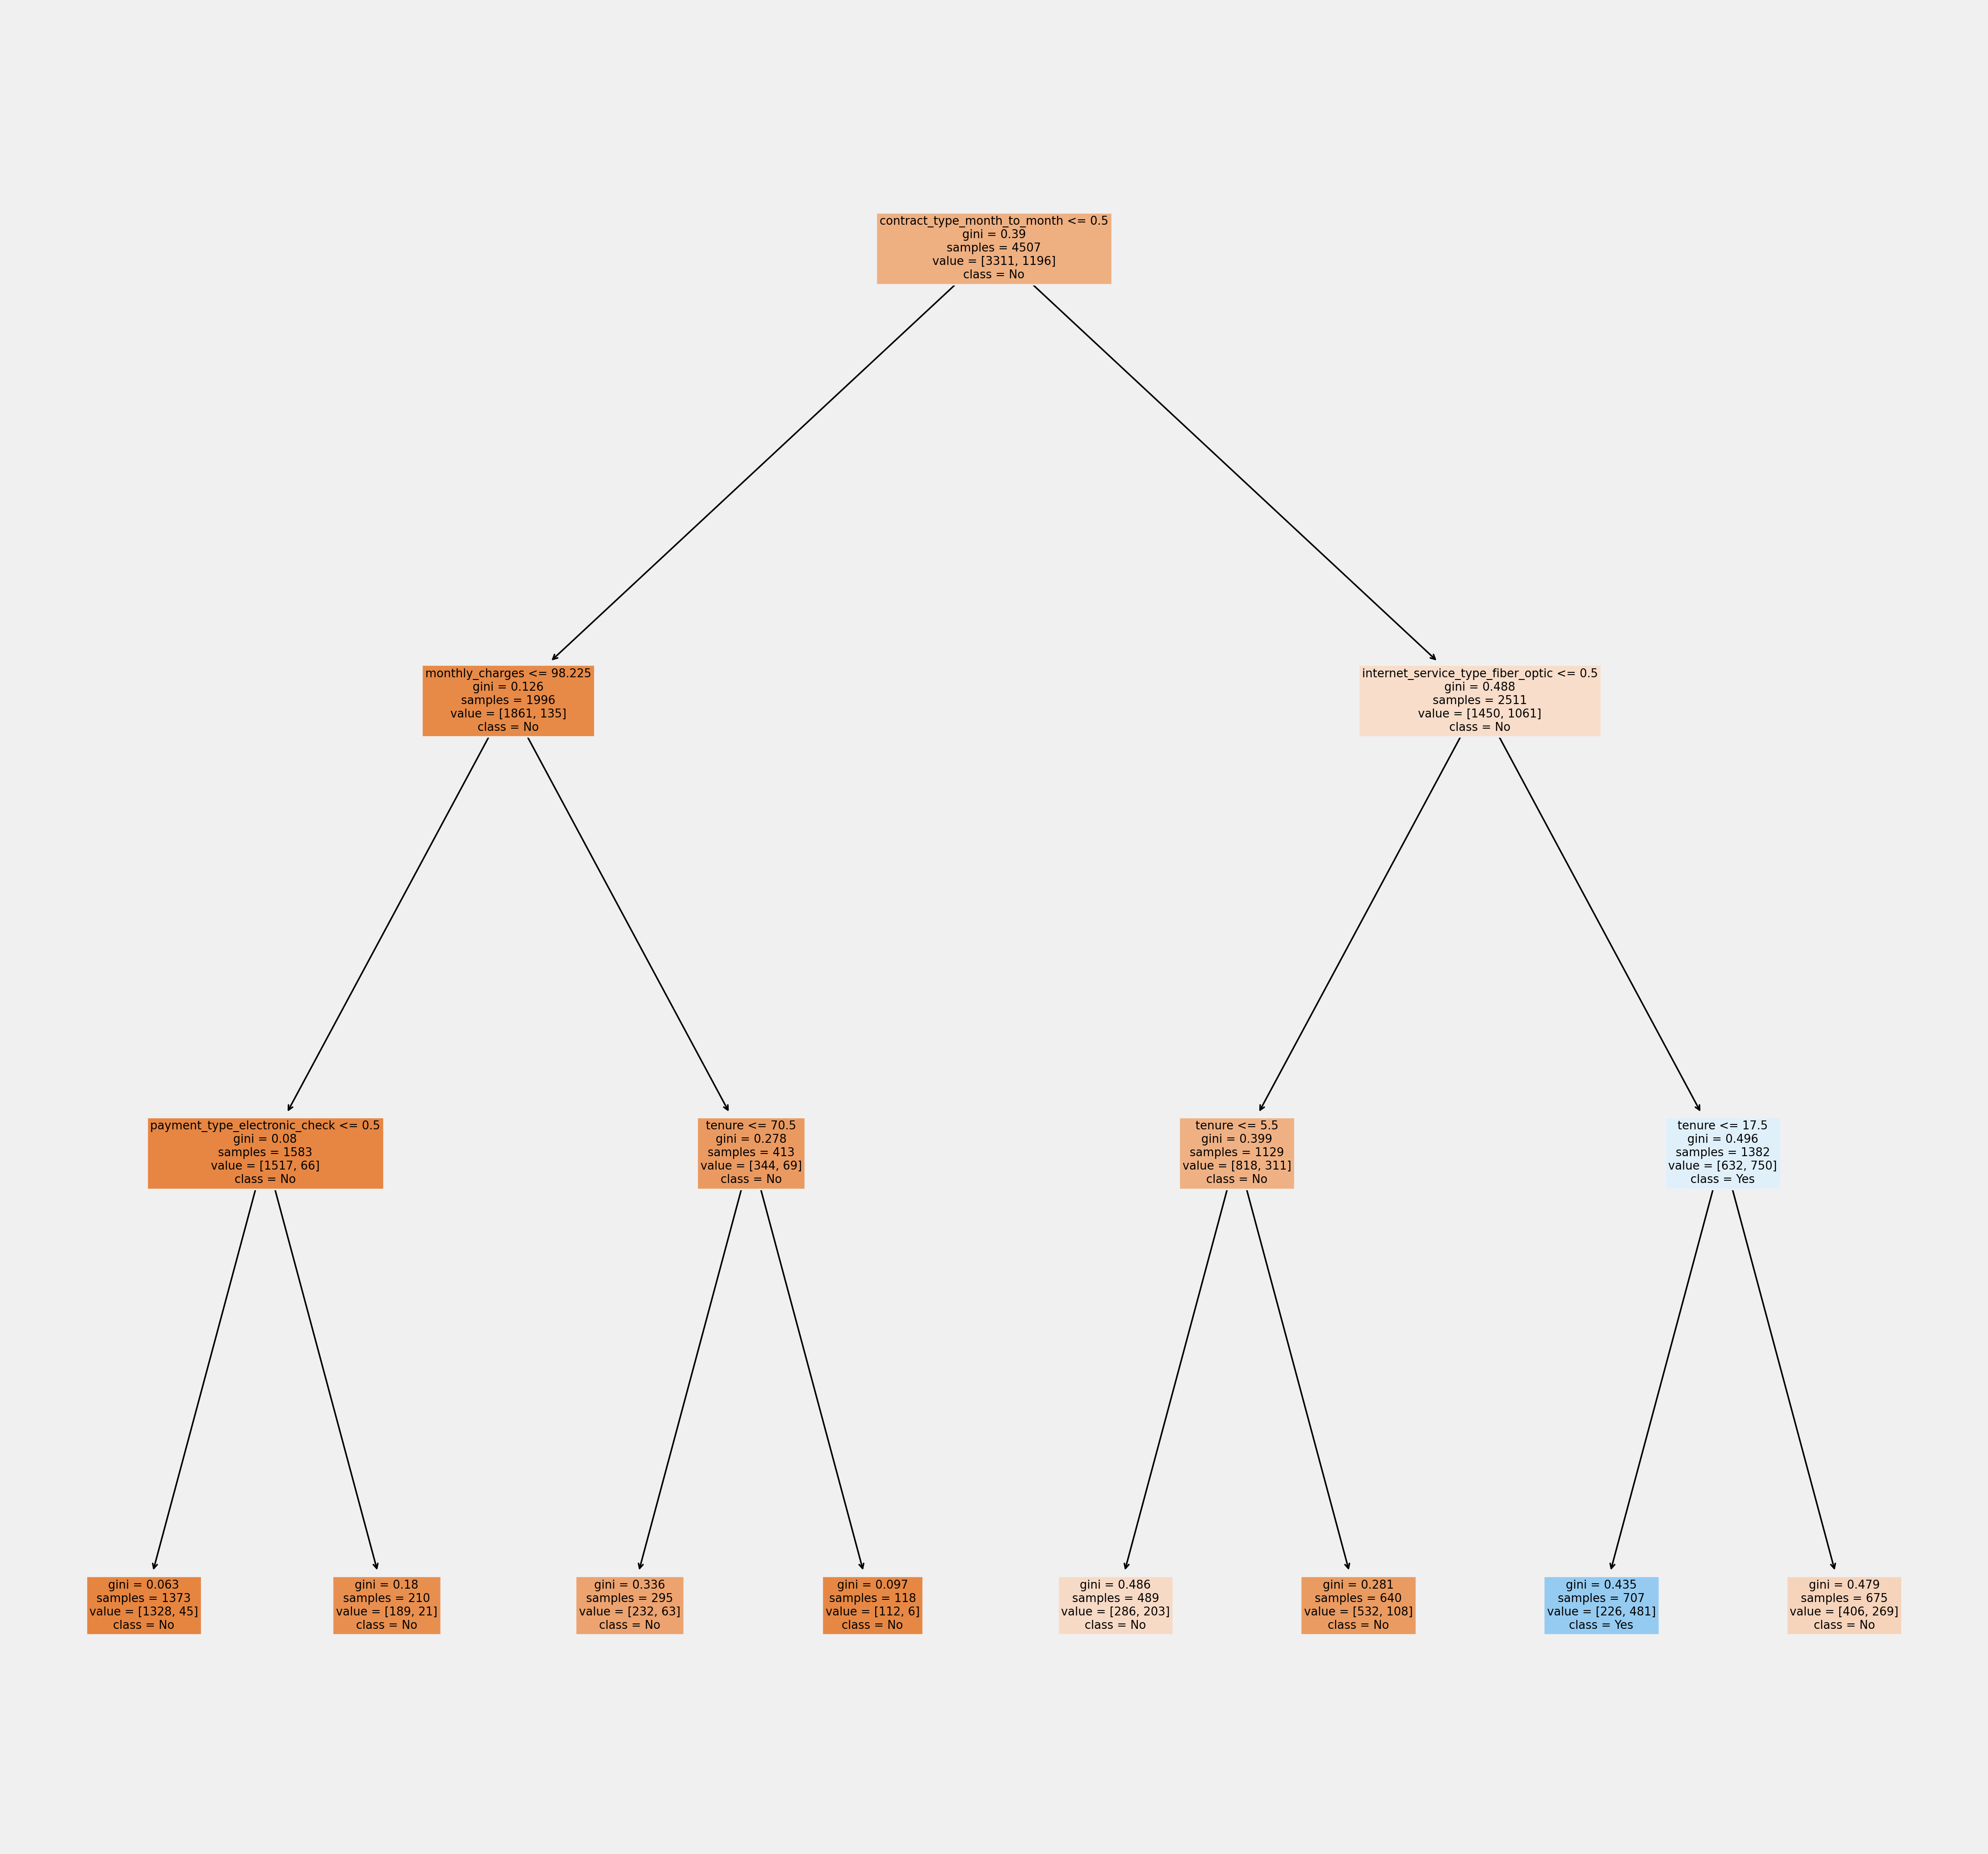

In [47]:
# Plot Tree Model 1
# Change __ to unique options of 
labels = list(train['churn'].astype(str))
#plt.figure(figsize=(30,30),dpi=50)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=500)
plot_tree(clf, feature_names=x_train.columns.to_list(), class_names=labels,filled=True)
plt.show()

In [48]:
m.decision_tree_compiled(x_train,y_train,train,plot=False)
print('\n')
m.decision_tree_compiled(x_val,y_val,validate,plot=False)
print('\n')
m.decision_tree_compiled(x_test,y_test,test,plot=False)

Accuracy: 0.791213667628134

True Positive Rate/Sensitivity/Recall/Power: 0.40217391304347827
False Positive Rate/False Alarm Ratio/Fall-out: 0.06825732407127756
True Negative Rate/Specificity/Selectivity: 0.9317426759287224
False Negative Rate/Miss Rate: 0.5978260869565217

Precision/PPV: 0.6803394625176803
F1 Score: 0.5055176037834996

Support (0): 1196
Support (1): 3311


Accuracy: 0.7905944986690329

True Positive Rate/Sensitivity/Recall/Power: 0.3979933110367893
False Positive Rate/False Alarm Ratio/Fall-out: 0.06763285024154589
True Negative Rate/Specificity/Selectivity: 0.9323671497584541
False Negative Rate/Miss Rate: 0.6020066889632107

Precision/PPV: 0.68
F1 Score: 0.5021097046413503

Support (0): 299
Support (1): 828


Accuracy: 0.7877927608232789

True Positive Rate/Sensitivity/Recall/Power: 0.29411764705882354
False Positive Rate/False Alarm Ratio/Fall-out: 0.033816425120772944
True Negative Rate/Specificity/Selectivity: 0.966183574879227
False Negative Rate/Miss Rate: 0.7

## Model 1: Decision Tree Evaluated
### Accuracy
---
- Baseline: .735
- Train: .79
- Validate: .80
- Test: .79



With a train accuracy of .79 and 

## Model 1: K Nearest Neighbor

In [49]:
knn1 = KNeighborsClassifier(n_neighbors=7, weights='uniform')

In [50]:
knn1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [51]:
model3_prediction = knn1.predict(x_train)
model3_probability = knn1.predict_proba(x_train)

model3_prediction_val = knn1.predict(x_val)
model3_probability_val = knn1.predict_proba(x_val)

model3_prediction_test = knn1.predict(x_test)
model3_probability_test = knn1.predict_proba(x_test)

In [52]:
TN, FP, FN, TP = confusion_matrix(y_train, model3_prediction).ravel()
m.get_classification_report(y_train,model3_prediction)

,precision,recall,f1-score,support
0,0.856540,0.919662,0.886979,3311.000000
accuracy,0.827823,0.827823,0.827823,0.827823
weighted avg,0.820463,0.827823,0.821104,4507.000000
macro avg,0.788564,0.746620,0.762857,4507.000000
1,0.720588,0.573579,0.638734,1196.000000


In [53]:
m.metrics(TN, FP, FN, TP)

Accuracy: 0.8278233858442423

True Positive Rate/Sensitivity/Recall/Power: 0.5735785953177257
False Positive Rate/False Alarm Ratio/Fall-out: 0.080338266384778
True Negative Rate/Specificity/Selectivity: 0.919661733615222
False Negative Rate/Miss Rate: 0.42642140468227424

Precision/PPV: 0.7205882352941176
F1 Score: 0.6387337057728119

Support (0): 1196
Support (1): 3311


In [54]:
TN, FP, FN, TP = confusion_matrix(y_val, model3_prediction_val).ravel()
print(classification_report(y_val,model3_prediction_val))

TN, FP, FN, TP = confusion_matrix(y_test, model3_prediction_test).ravel()
m.get_classification_report(y_test,model3_prediction_test)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       828
           1       0.60      0.46      0.52       299

    accuracy                           0.78      1127
   macro avg       0.71      0.67      0.69      1127
weighted avg       0.76      0.78      0.77      1127



,precision,recall,f1-score,support
0,0.827839,0.873430,0.850024,1035.000000
accuracy,0.773598,0.773598,0.773598,0.773598
weighted avg,0.763845,0.773598,0.767294,1409.000000
macro avg,0.707295,0.685378,0.694187,1409.000000
1,0.586751,0.497326,0.538350,374.000000


## Model 1: KNN Hypertuning for Best Parameters

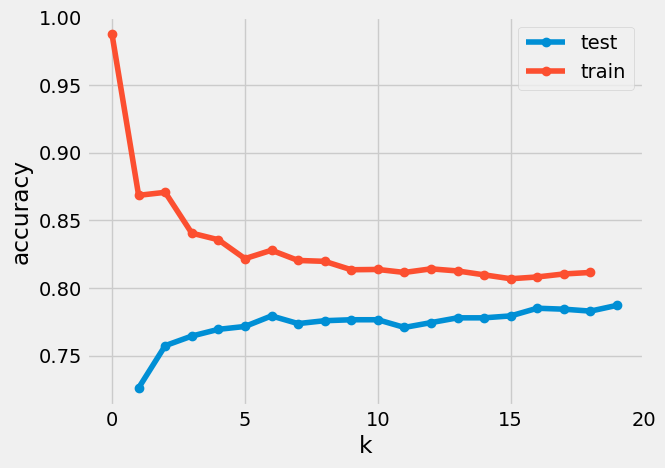

In [55]:
k_range = range(1, 20)
train_scores = []
test_scores = []
for k in k_range:
    knn_loop = KNeighborsClassifier(n_neighbors = k)
    knn_loop.fit(x_train, y_train)
    train_scores.append(knn_loop.score(x_train, y_train))
    test_scores.append(knn_loop.score(x_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, test_scores,'o-',train_scores,'o-')
plt.legend(['test','train'])
plt.xticks([0,5,10,15,20])
plt.show()

In [56]:
m.knn_compiled(x_train,y_train,x_test,y_test)

Best fit "n_neighbors" parameter (Determined by GridSearchCV): 14 
--------------------------------------
Train Class Report & Metrics:      
---------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3311
           1       0.97      0.98      0.98      1196

    accuracy                           0.99      4507
   macro avg       0.98      0.98      0.98      4507
weighted avg       0.99      0.99      0.99      4507

Accuracy: 0.9873530064344354

True Positive Rate/Sensitivity/Recall/Power: 0.9782608695652174
False Positive Rate/False Alarm Ratio/Fall-out: 0.009362730292962852
True Negative Rate/Specificity/Selectivity: 0.9906372697070371
False Negative Rate/Miss Rate: 0.021739130434782608

Precision/PPV: 0.974188176519567
F1 Score: 0.9762202753441802

Support (0): 1196
Support (1): 3311
None 

Test Classificiation Report & Metrics:      
--------------------------------------
              precisio